### Student Information
Name: 吳文婷        

Student ID:d301111002   

GitHub ID:Jillwu0506

---

### Instructions

1. First: do the **take home** exercises in the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://huggingface.co/datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data). The dataset contains a `sentiment` and `comment` columns, with the sentiment labels being: 'nostalgia' and 'not nostalgia'. Read the specificiations of the dataset for background details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/didiersalazar/DM2024-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Sunday)__. 

In [1]:
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

## **Take Home Exercise in Lab 1 Master**

In [76]:
import pandas as pd
import numpy as np
import nltk
import helpers.data_mining_helpers as dmh
import re
import seaborn as sns
import matplotlib.pyplot as plt


In [50]:

# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42)

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

# add category to the dataframe
X['category'] = twenty_train.target

# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

X.head()

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian


### **>>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information.

In [6]:
#sort the documents by category
X.sort_values('category', inplace=True)
X.head()

,text,category,category_name
745,From: sandvik@newton.apple.com (Kent Sandvik) ...,0,alt.atheism
1543,From: keith@cco.caltech.edu (Keith Allan Schne...,0,alt.atheism
1696,From: jaeger@buphy.bu.edu (Gregg Jaeger) Subje...,0,alt.atheism
1271,From: mangoe@cs.umd.edu (Charley Wingate) Subj...,0,alt.atheism
2237,From: datepper@phoenix.Princeton.EDU (David Aa...,0,alt.atheism


In [51]:
#calculate the number of documents in each category
category_counts = X['category_name'].value_counts()
print(category_counts)

category_name
soc.religion.christian    599
sci.med                   594
comp.graphics             584
alt.atheism               480
Name: count, dtype: int64


### >>> **Exercise 5 (take home)**

In [10]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


**Answer:**  
A: nan in numpy means missing value  
B: missing value  
C: string 'NaN' (not missing value)  
D: string 'None'(not missing value)  
E: None means missing value in python  
F: empty string (not missing value)

### >>> **Exercise 6 (take home):**

In [15]:
X_sample = X.sample(n=1000) #random state

# calculate the distribution of categories
category_counts = X['category_name'].value_counts()
category_counts_sample = X_sample['category_name'].value_counts()
category_distribution = category_counts / category_counts.sum()
category_distribution_sample = category_counts_sample / category_counts_sample.sum()

print(category_counts / category_counts.sum())
print(category_counts_sample / category_counts_sample.sum())

category_name
soc.religion.christian    0.265397
sci.med                   0.263181
comp.graphics             0.258751
alt.atheism               0.212672
Name: count, dtype: float64
category_name
soc.religion.christian    0.263
comp.graphics             0.258
sci.med                   0.252
alt.atheism               0.227
Name: count, dtype: float64


**Answer:**
 The distribution of categories in X_sample is similar to the X**


### >>> **Exercise 8 (take home):** 


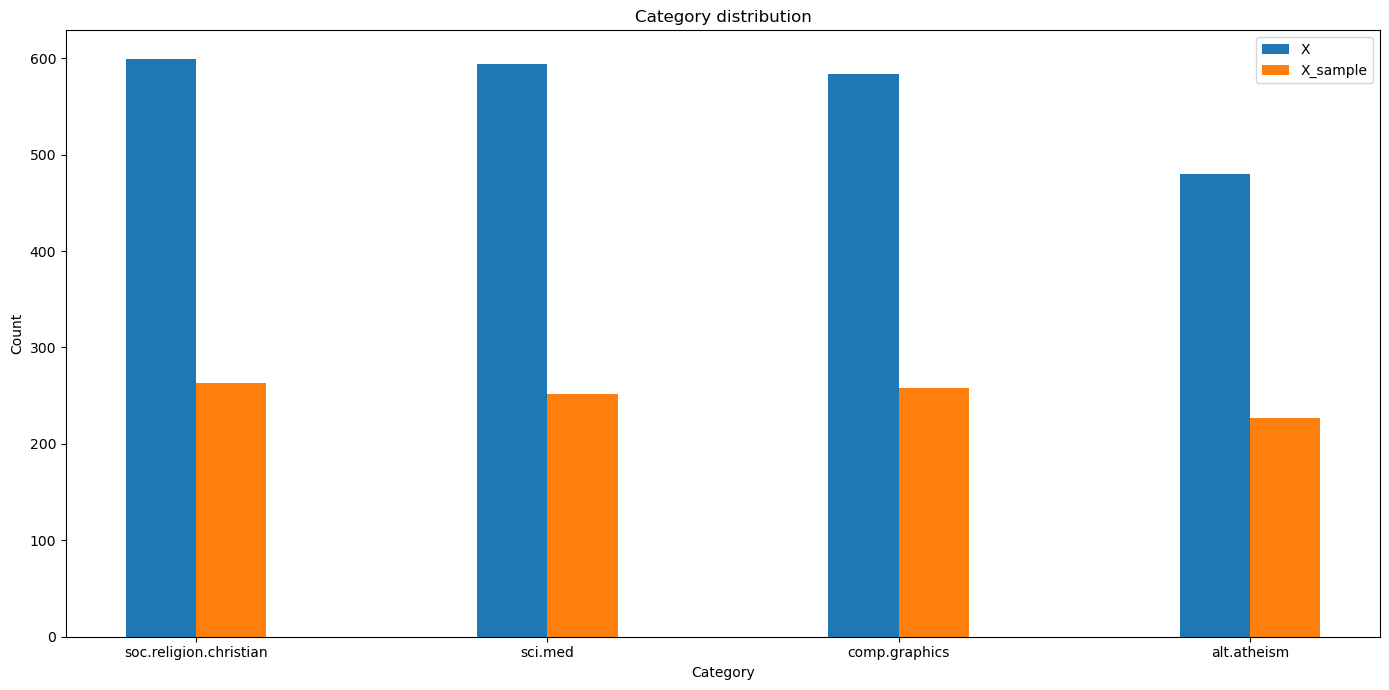

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# combine the category counts in X and X_sample
combined_df = pd.DataFrame({
    'Category': category_counts.index,
    'X': category_counts.values,
    'X_sample': category_counts_sample.reindex(category_counts.index).fillna(0).values
})

# draw the bar chart
plt.figure(figsize=(14, 7))
bar_width = 0.2
index = range(len(combined_df))

plt.bar(index, combined_df['X'], bar_width, label='X')
plt.bar([i + bar_width for i in index], combined_df['X_sample'], bar_width, label='X_sample')

plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Category distribution')
plt.xticks([i + bar_width / 2 for i in index], combined_df['Category'])
plt.legend()

plt.tight_layout()
plt.show()


In [52]:
import nltk
# takes a like a minute or two to process
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

### **>>> Exercise 10 (take home):**

In [82]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix

analyze = count_vect.build_analyzer()
analyze(X.text[0])
X_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [83]:
# grab the first row of the document-term matrix and convert it to a list
feature_names = count_vect.get_feature_names_out()

#Find the '1' in fifth_record and get the corresponding word
fifth_record = X_counts[4].toarray()[0]  
indices = [i for i, x in enumerate(fifth_record) if x == 1]

# get the words corresponding to the indices
words = [feature_names[i] for i in indices]
print(words)

['00', '01', '14', '15', '22', '22824', '28246', '41', '57', 'am', 'at', 'attend', 'believe', 'brother', 'certain', 'chose', 'christ', 'columbia', 'columbiasc', 'corp', 'customary', 'decision', 'died', 'elder', 'equalivant', 'fc', 'find', 'fnal', 'from', 'given', 'go', 'gov', 'grok11', 'heaven', 'highways', 'his', 'hmmmmmm', 'hp', 'hpfcso', 'invite', 'it', 'king', 'kingdom', 'lines', 'made', 'main', 'many', 'marriage', 'matt', 'odds', 'on', 'one', 'organization', 'provided', 'put', 're', 'refused', 'rexlex', 'righteousness', 'sc', 'shrum', 'sins', 'so', 'son', 'sounds', 'subject', 'tells', 'that', 'then', 'theology', 'there', 'therefore', 'unto', 'wear', 'when', 'who', 'writes', 'you', 'your']


**# Answer:**
 The word of second '1' is '01' and we also know all words having '1' in fifth_record.

### **>>> Exercise 11 (take home):** 


C:\Users\jill\AppData\Local\Temp\ipykernel_35680\1062165154.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_counts.index, y=feature_counts.values, palette='viridis')


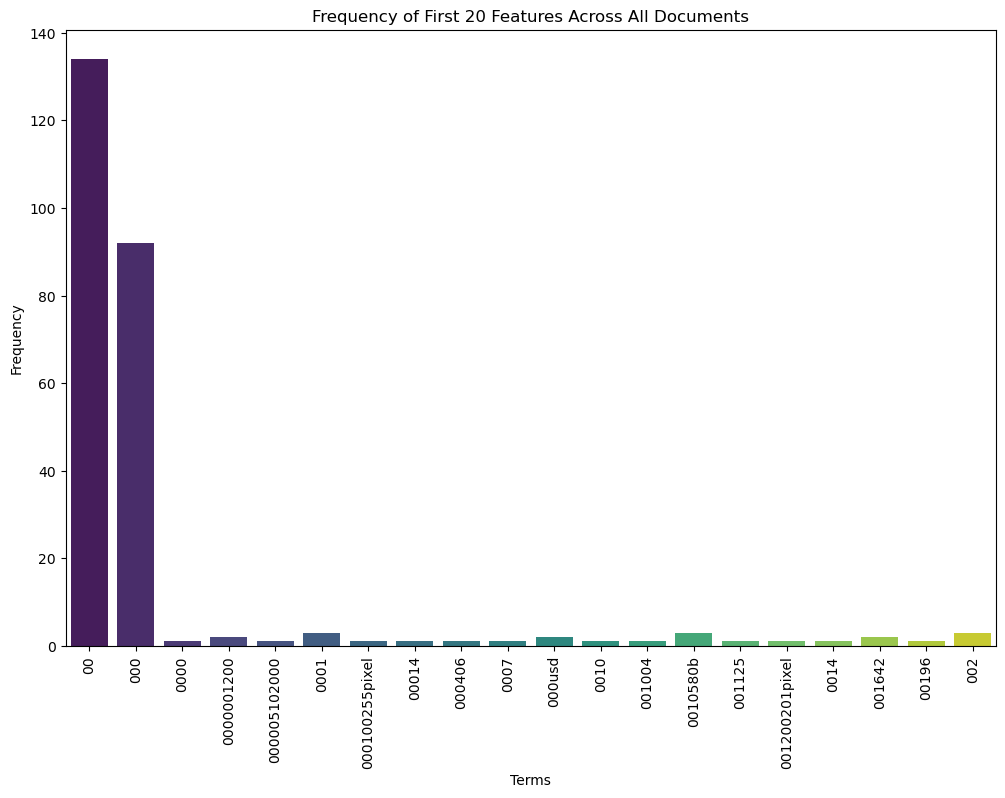

In [89]:
import seaborn as sns
# Only select the first 20 features
selected_features = feature_names[:20]

# Get the document term matrix
X_counts_selected = X_counts[:, :20].toarray()

# Create a dataframe for seaborn plot
df_todraw = pd.DataFrame(X_counts_selected, columns=selected_features)

# Count the frequency of each word
feature_counts = df_todraw.sum(axis=0)

# draw the bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_counts.index, y=feature_counts.values, palette='viridis')
plt.title('Frequency of First 20 Features Across All Documents')
plt.xlabel('Terms')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

### >>> **Exercise 12 (take home):**

In [87]:
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))


In [95]:
import plotly.express as px

# count the frequency of each term
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

# plot the frequency of the first 300 features
fig = px.bar(df_todraw, x=count_vect.get_feature_names_out()[:300], y=term_frequencies[:300], title='Frequency of Frist 300 Features')
fig.update_layout(xaxis_title='Terms', yaxis_title='Frequency', xaxis_tickangle=-90, width=1500, height=800)
fig.show()

### >>> **Exercise 13 (take home):** 

In [96]:
# Create a dataframe for sorting the top 20 features
df = pd.DataFrame({'Term': count_vect.get_feature_names_out(), 'Frequency': term_frequencies})
df_sorted = df.sort_values(by='Frequency', ascending=False).head(20)

# plot the frequency of the top 20 features
fig = px.bar(df_sorted, x='Term', y='Frequency', title='Top 20 Features by Frequency')
fig.update_layout(xaxis_title='Terms', yaxis_title='Frequency', xaxis_tickangle=-45)
fig.show()

### >>> **Exercise 14 (take home):** 

C:\Users\jill\AppData\Local\Temp\ipykernel_35680\4195775830.py:7: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



[Text(0, 0, '10'),
 Text(1, 0, '00'),
 Text(2, 0, '100'),
 Text(3, 0, '03'),
 Text(4, 0, '01'),
 Text(5, 0, '000'),
 Text(6, 0, '05'),
 Text(7, 0, '02'),
 Text(8, 0, '04'),
 Text(9, 0, '08'),
 Text(10, 0, '09'),
 Text(11, 0, '07'),
 Text(12, 0, '0358'),
 Text(13, 0, '1000'),
 Text(14, 0, '101'),
 Text(15, 0, '06'),
 Text(16, 0, '00pm'),
 Text(17, 0, '1013'),
 Text(18, 0, '102'),
 Text(19, 0, '1024x768'),
 Text(20, 0, '071'),
 Text(21, 0, '1024'),
 Text(22, 0, '00am'),
 Text(23, 0, '0349'),
 Text(24, 0, '084042'),
 Text(25, 0, '0511'),
 Text(26, 0, '081052'),
 Text(27, 0, '101010'),
 Text(28, 0, '0200'),
 Text(29, 0, '0100'),
 Text(30, 0, '103'),
 Text(31, 0, '095220'),
 Text(32, 0, '0423'),
 Text(33, 0, '040'),
 Text(34, 0, '01580'),
 Text(35, 0, '02118'),
 Text(36, 0, '0293'),
 Text(37, 0, '0600'),
 Text(38, 0, '02173'),
 Text(39, 0, '041343'),
 Text(40, 0, '023044'),
 Text(41, 0, '024103'),
 Text(42, 0, '0608'),
 Text(43, 0, '06320'),
 Text(44, 0, '0x100'),
 Text(45, 0, '102007'),
 T

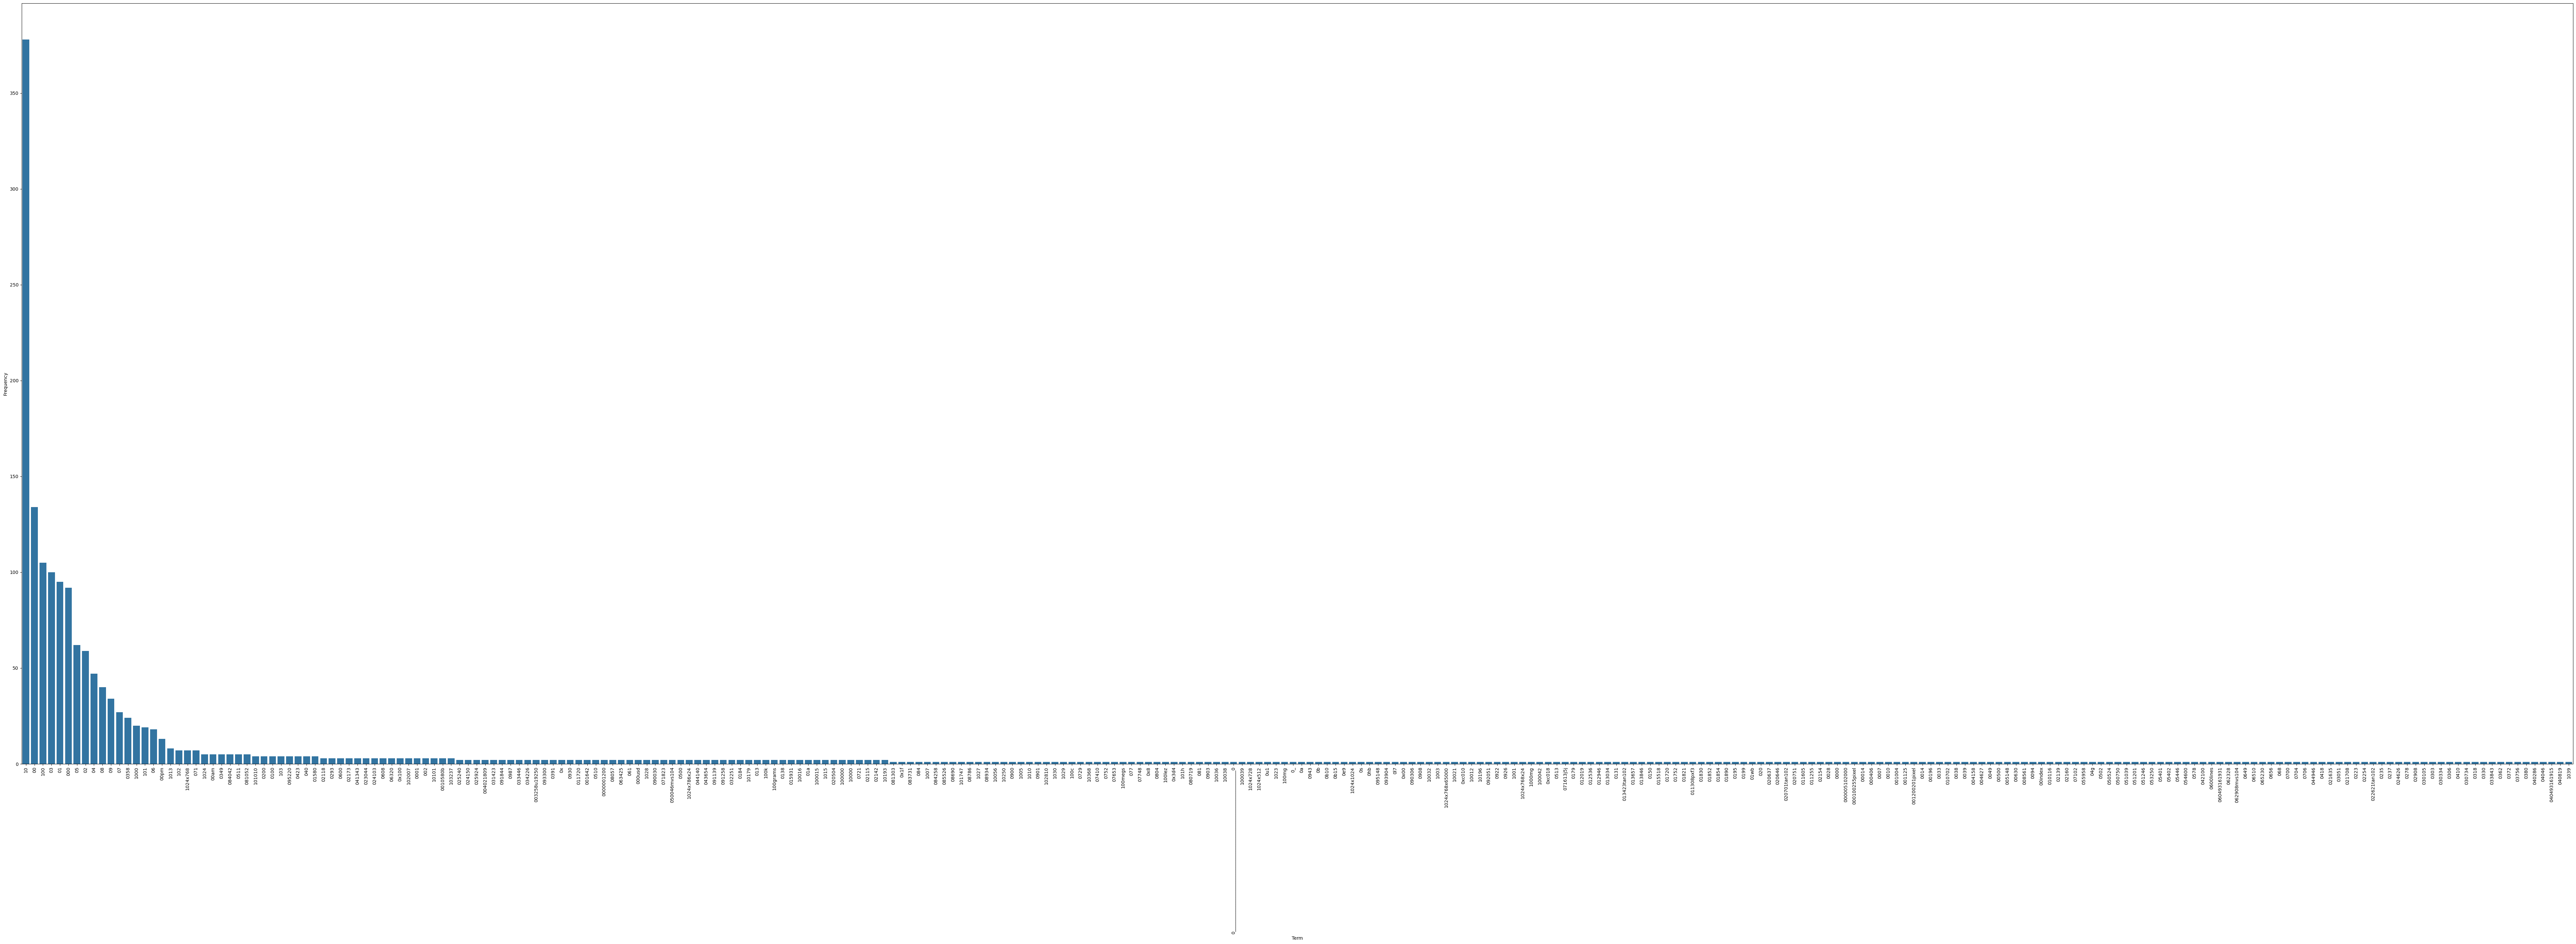

In [106]:
# Create a dataframe for sorting the first 300 features
df = pd.DataFrame({'Term': count_vect.get_feature_names_out()[:300], 'Frequency': term_frequencies[:300]})
df_sorted = df.sort_values(by='Frequency', ascending=False)

# plot the frequency of the first 300 features
plt.subplots(figsize=(100, 30))
g = sns.barplot(x='Term', y='Frequency', data=df_sorted)
g.set_xticklabels(g.get_xticklabels(), rotation=90)


### >>> **Exercise 15 (take home):** 


C:\Users\jill\AppData\Local\Temp\ipykernel_35680\3260780071.py:11: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



[Text(0, 0, '10'),
 Text(1, 0, '00'),
 Text(2, 0, '100'),
 Text(3, 0, '03'),
 Text(4, 0, '01'),
 Text(5, 0, '000'),
 Text(6, 0, '05'),
 Text(7, 0, '02'),
 Text(8, 0, '04'),
 Text(9, 0, '08'),
 Text(10, 0, '09'),
 Text(11, 0, '07'),
 Text(12, 0, '0358'),
 Text(13, 0, '1000'),
 Text(14, 0, '101'),
 Text(15, 0, '06'),
 Text(16, 0, '00pm'),
 Text(17, 0, '1013'),
 Text(18, 0, '102'),
 Text(19, 0, '1024x768'),
 Text(20, 0, '071'),
 Text(21, 0, '1024'),
 Text(22, 0, '00am'),
 Text(23, 0, '0349'),
 Text(24, 0, '084042'),
 Text(25, 0, '0511'),
 Text(26, 0, '081052'),
 Text(27, 0, '101010'),
 Text(28, 0, '0200'),
 Text(29, 0, '0100'),
 Text(30, 0, '103'),
 Text(31, 0, '095220'),
 Text(32, 0, '0423'),
 Text(33, 0, '040'),
 Text(34, 0, '01580'),
 Text(35, 0, '02118'),
 Text(36, 0, '0293'),
 Text(37, 0, '0600'),
 Text(38, 0, '02173'),
 Text(39, 0, '041343'),
 Text(40, 0, '023044'),
 Text(41, 0, '024103'),
 Text(42, 0, '0608'),
 Text(43, 0, '06320'),
 Text(44, 0, '0x100'),
 Text(45, 0, '102007'),
 T

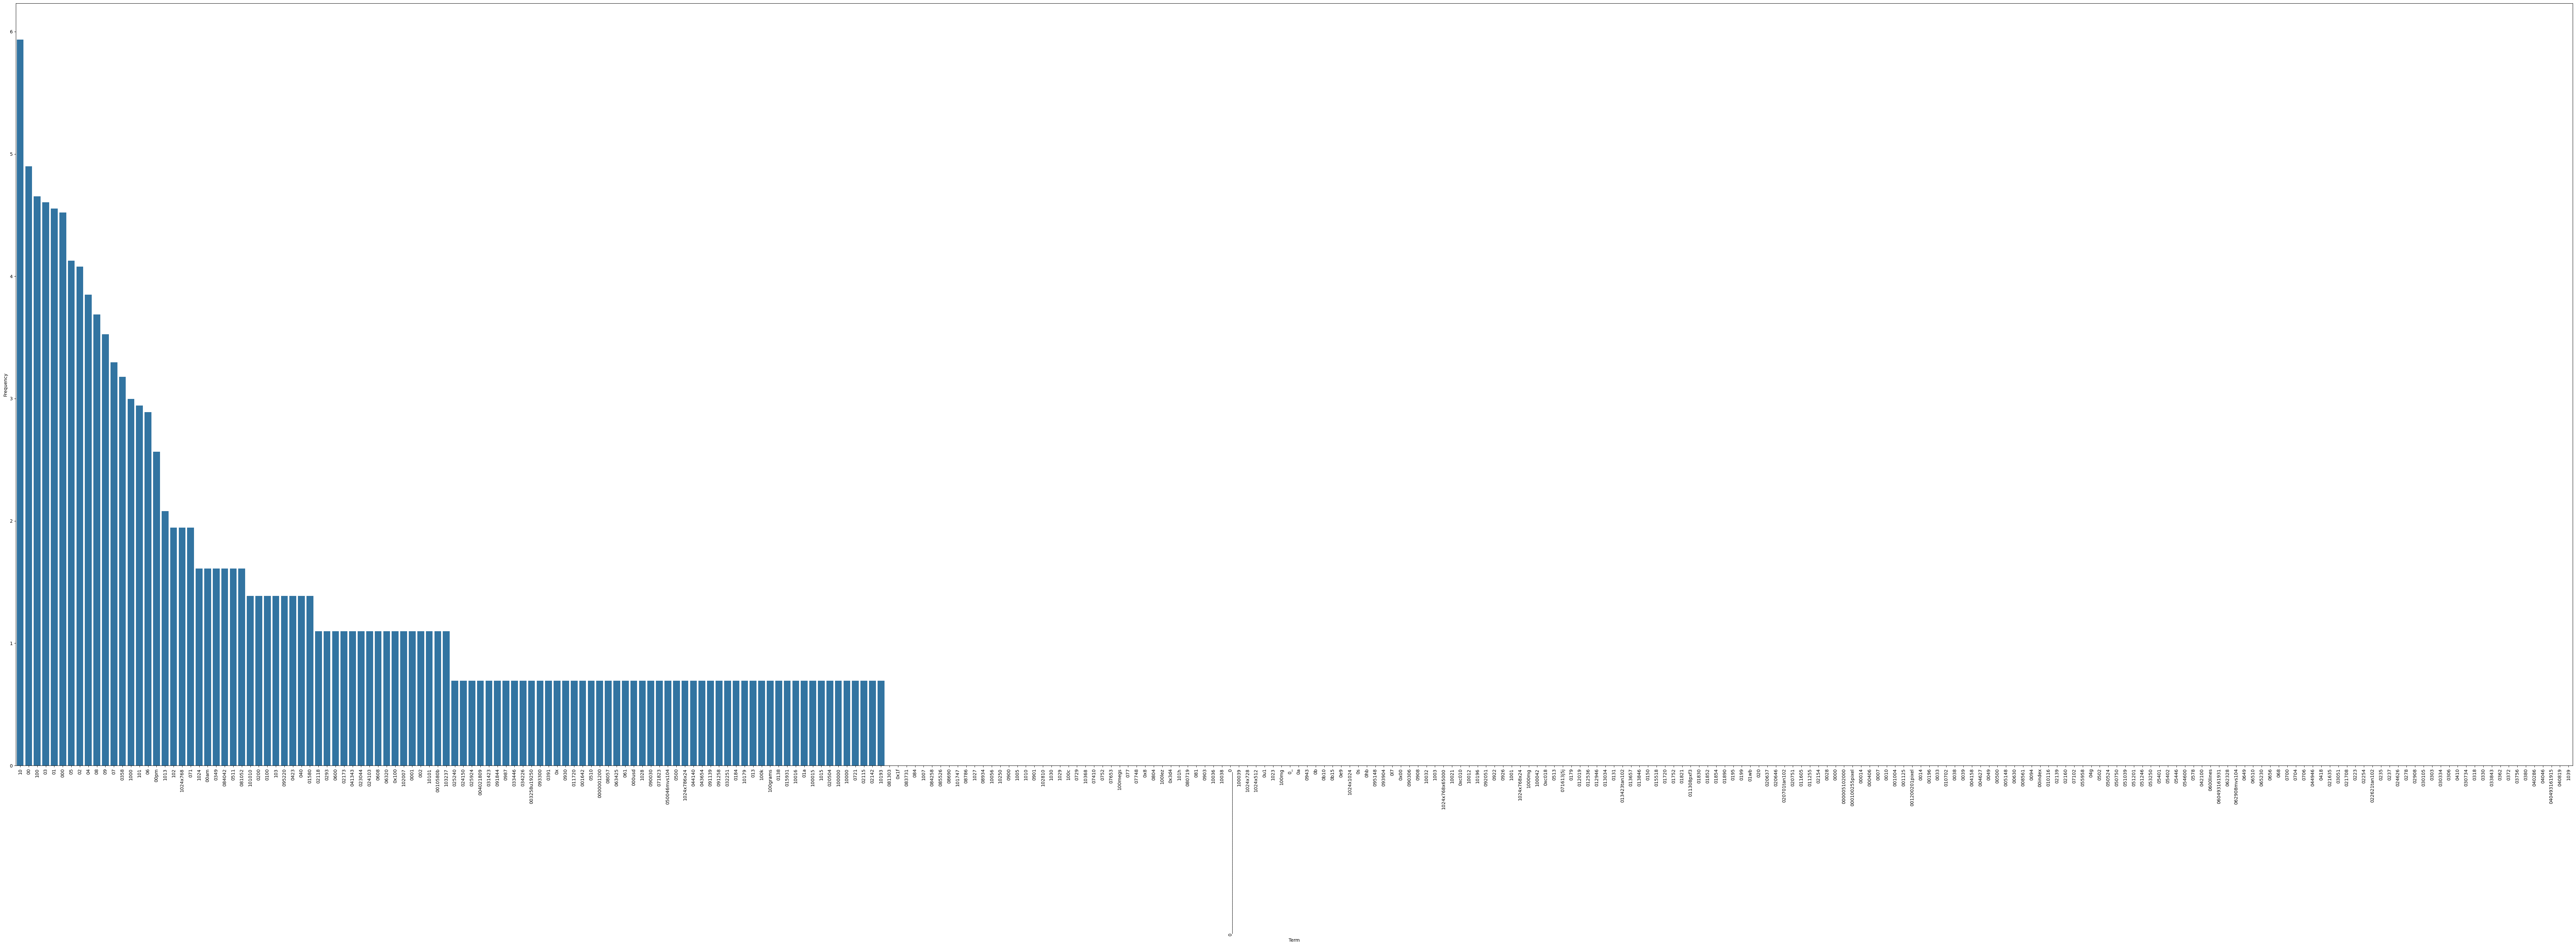

In [107]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

# Create a dataframe for sorting the first 300 features using log 
df = pd.DataFrame({'Term': count_vect.get_feature_names_out()[:300], 'Frequency': term_frequencies_log[:300]})
df_sorted = df.sort_values(by='Frequency', ascending=False)

# plot the frequency of the first 300 features
plt.subplots(figsize=(100, 30))
g = sns.barplot(x='Term', y='Frequency', data=df_sorted)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

**Answer**  
Using term_frequencies_log instead of raw frequencies to plot the chart can reduce the disparity between high-frequency and low-frequency terms, making the chart more balanced and readable.
  
Log frequencies also can help identify terms that are not prominent in raw frequencies but are still important in specific contexts.  

### >>> **Exercise 16 (take home):** 


In [116]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

#Create separate DataFrames for each category
categories = X['category_name'].unique()  # Get unique category labels
category_dfs = {}  # Dictionary to store DataFrames for each category

for category in categories:
    # Filter the original DataFrame by category
    category_dfs[category] = X[X['category_name'] == category].copy()

# Function to create term-document frequency DataFrame for each category
def create_term_document_df(df):
    count_vect = CountVectorizer()  # Initialize the CountVectorizer
    X_counts = count_vect.fit_transform(df['text'])  # Transform the text data into word counts
    
    # Get the unique words (vocabulary) from the vectorizer
    words = count_vect.get_feature_names_out()
    
    # Create a DataFrame where rows are documents and columns are words
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)
    
    return term_document_df

# Create term-document frequency DataFrames for each category
filt_term_document_dfs = {}  # Dictionary to store term-document DataFrames for each category

for category in categories:
    filt_term_document_dfs[category] = create_term_document_df(category_dfs[category])

In [119]:
# Display the filtered DataFrame for one of the categories, feel free to change the number in the vector
category_number=1 #You can change it from 0 to 3
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
filt_term_document_dfs[categories[category_number]]

Filtered Term-Document Frequency DataFrame for Category soc.religion.christian:


,00,000,0001,0014,00630,01,0131,01580,02,02173,...,zebedee,zechariah,zeitschrift,zeke,zero,zeta,zilch,zoerasterism,zorasterism,zwart
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
595,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
596,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
597,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [125]:
category_number=0 #You can change it from 0 to 3

# Filter the bottom 1% and top 5% words based on their sum across all documents
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    # Calculate the sum of each word across all documents
    word_sums = term_document_df.sum(axis=0)
    
    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()
    
    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    
    # Get the words to remove from the top 5% and bottom 1%
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    print(f'Bottom {bottom_percent*100}% words: \n{sorted_words.head(bottom_n)}') #Here we print which words correspond to the bottom percentage we filter
    print(f'Top {top_percent*100}% words: \n{sorted_words.tail(top_n)}') #Here we print which words correspond to the top percentage we filter
    # Return the DataFrame without the filtered words
    return term_document_df.drop(columns=words_to_remove)

# Apply the filtering function to each category
term_document_dfs = {}

for category in categories:
    print(f'\nFor category {category} we filter the following words:')
    term_document_dfs[category] = filter_top_bottom_words_by_sum(filt_term_document_dfs[category])

# Example: Display the filtered DataFrame for one of the categories
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
term_document_dfs[categories[category_number]]


For category comp.graphics we filter the following words:
Bottom 1.0% words: 
initworld    1
jkpg         1
jiu1         1
jiu          1
jfreund      1
            ..
lab2         1
laaksone     1
l4v          1
l300         1
l14h11       1
Length: 137, dtype: int64
Top 5.0% words: 
40               27
distributed      27
open             27
multi            27
getting          27
               ... 
is             1751
and            2382
of             2470
to             2775
the            4537
Length: 687, dtype: int64

For category soc.religion.christian we filter the following words:
Bottom 1.0% words: 
disparate       1
expose          1
explosive       1
resisting       1
exploitation    1
               ..
fence           1
feminist        1
remarriage      1
remarried       1
remeber         1
Length: 138, dtype: int64
Top 5.0% words: 
pagan        36
claims       36
gave         36
parts        36
jr           37
          ...  
that       4393
and        4409
to        

,000,000005102000,000100255pixel,0007,000usd,0010580b,001200201pixel,00196,002,0028,...,zorn,zrz,zsoft,zt,zug,zurich,zvi,zyeh,zyxel,ªl
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
580,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
582,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Answer:**  
Number of Bottom 1.0% words:  
    comp.graphics:137  
    soc.religion.christian:138  
    sci.med:162  
    alt.atheism:119  
Number of Top 5.0% words:  
    comp.graphics:687   
    soc.religion.christian:693  
    sci.med:812  
    alt.atheism:598  

The first four most frequently occurring words are all the same in all four groups.('the', 'to', 'of', 'and')

### >>> **Exercise 17 (take home):** 

### >>> **Exercise 19 (take home):**

## **Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data**

## 1. The Data

## 2. Data Preparation


## 3. Data Transformation

## 4. Data Mining using Pandas